In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(rc={
    'figure.figsize': [6,6],
    'figure.dpi': 200
})

Generiamo un grafo a stella con 6 nodi

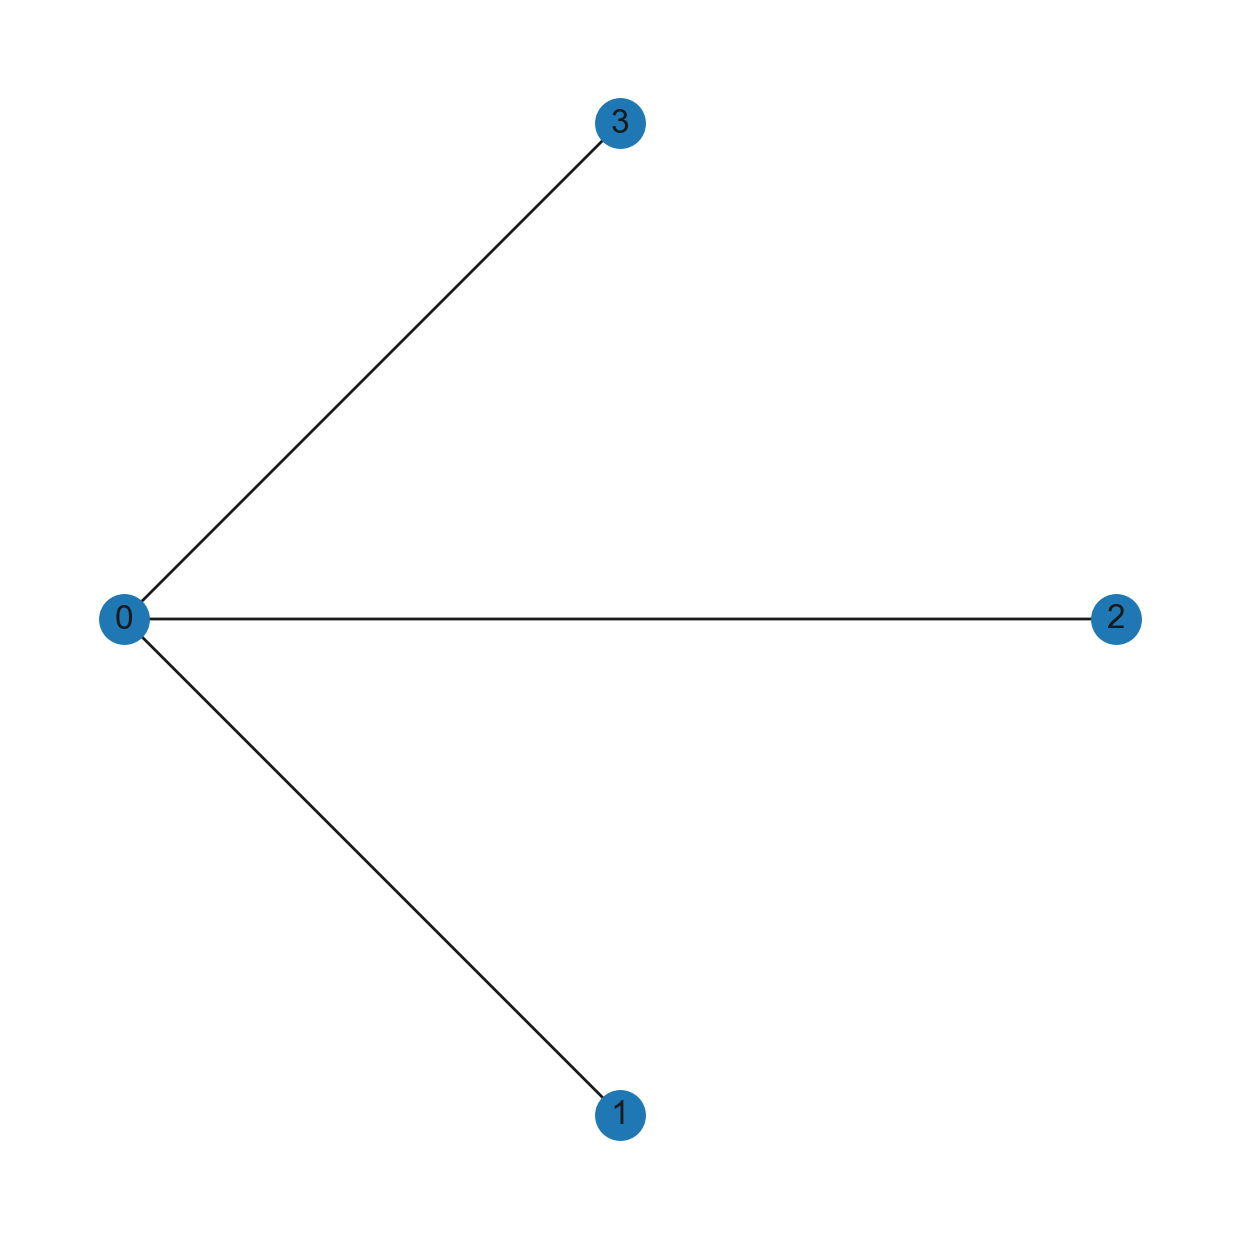

In [2]:
n_nodes = 4
G = nx.star_graph(n_nodes - 1)

# pos serve solo per disegnare il grafo con una certa disposizione di nodi e archi, si può cambiare
nx.draw(G, pos=nx.shell_layout(G), with_labels=True)

Generiamo un'istanza QUBO di MaxCut da questo grafo

In [3]:
from problems import *
from qaoa import QUBO

adjacency = nx.to_numpy_array(G) 
maxCut_instance = MaxCut(n_nodes)

qubo_maxCut_instance = maxCut_instance.compute_qubo(adjacency)
print(qubo_maxCut_instance.Q)

[[-3.  1.  1.  1.]
 [ 1. -1.  0.  0.]
 [ 1.  0. -1.  0.]
 [ 1.  0.  0. -1.]]


Per un'istanza MIS

In [4]:
mis_instance = MIS(n_nodes)
qubo_mis_instance = mis_instance.compute_qubo(adjacency)
print(qubo_mis_instance.Q)

[[-1.  1.  1.  1.]
 [ 1. -1.  0.  0.]
 [ 1.  0. -1.  0.]
 [ 1.  0.  0. -1.]]


## Generazione Ansatz QAOA

Mappiamo l'istanza di Max-Cut in un'ansatz QAOA con 2 layers

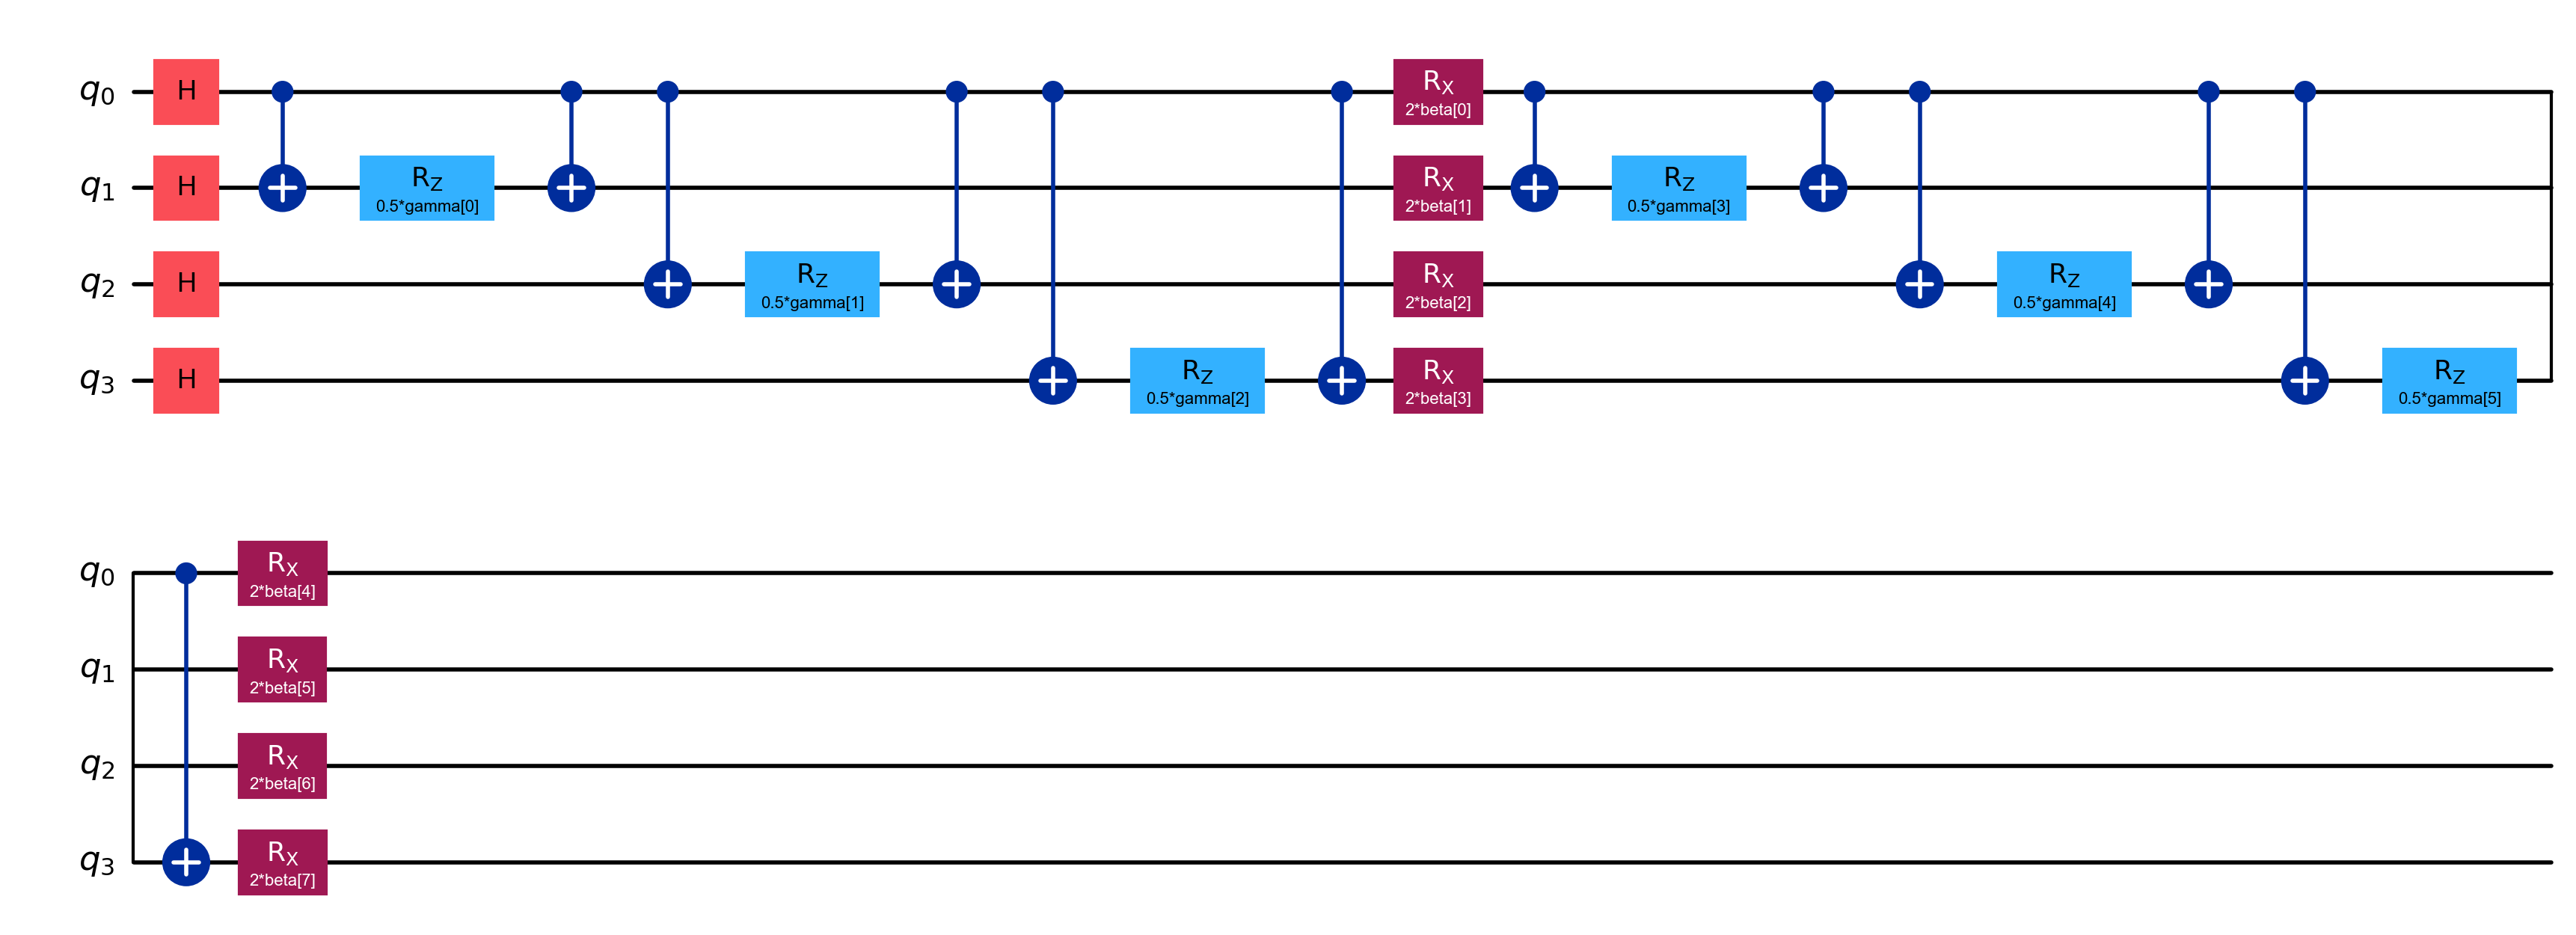

In [5]:
from qaoa import qaoa_composer

circuit, gamma, beta = qaoa_composer(qubo_maxCut_instance, n_layers=2, put_barriers=True)
circuit.draw('mpl', plot_barriers=False)

possiamo farlo anche con altri problemi, oltre al maxCut. Ad esempio, proviamo col maxClique


In [6]:
maxClique_instance = MaxClique(n_nodes)
qubo_maxClique_instance = maxClique_instance.compute_qubo(adjacency)
print(qubo_maxClique_instance.Q)

[[-1.  0.  0.  0.]
 [ 0. -1.  1.  1.]
 [ 0.  1. -1.  1.]
 [ 0.  1.  1. -1.]]


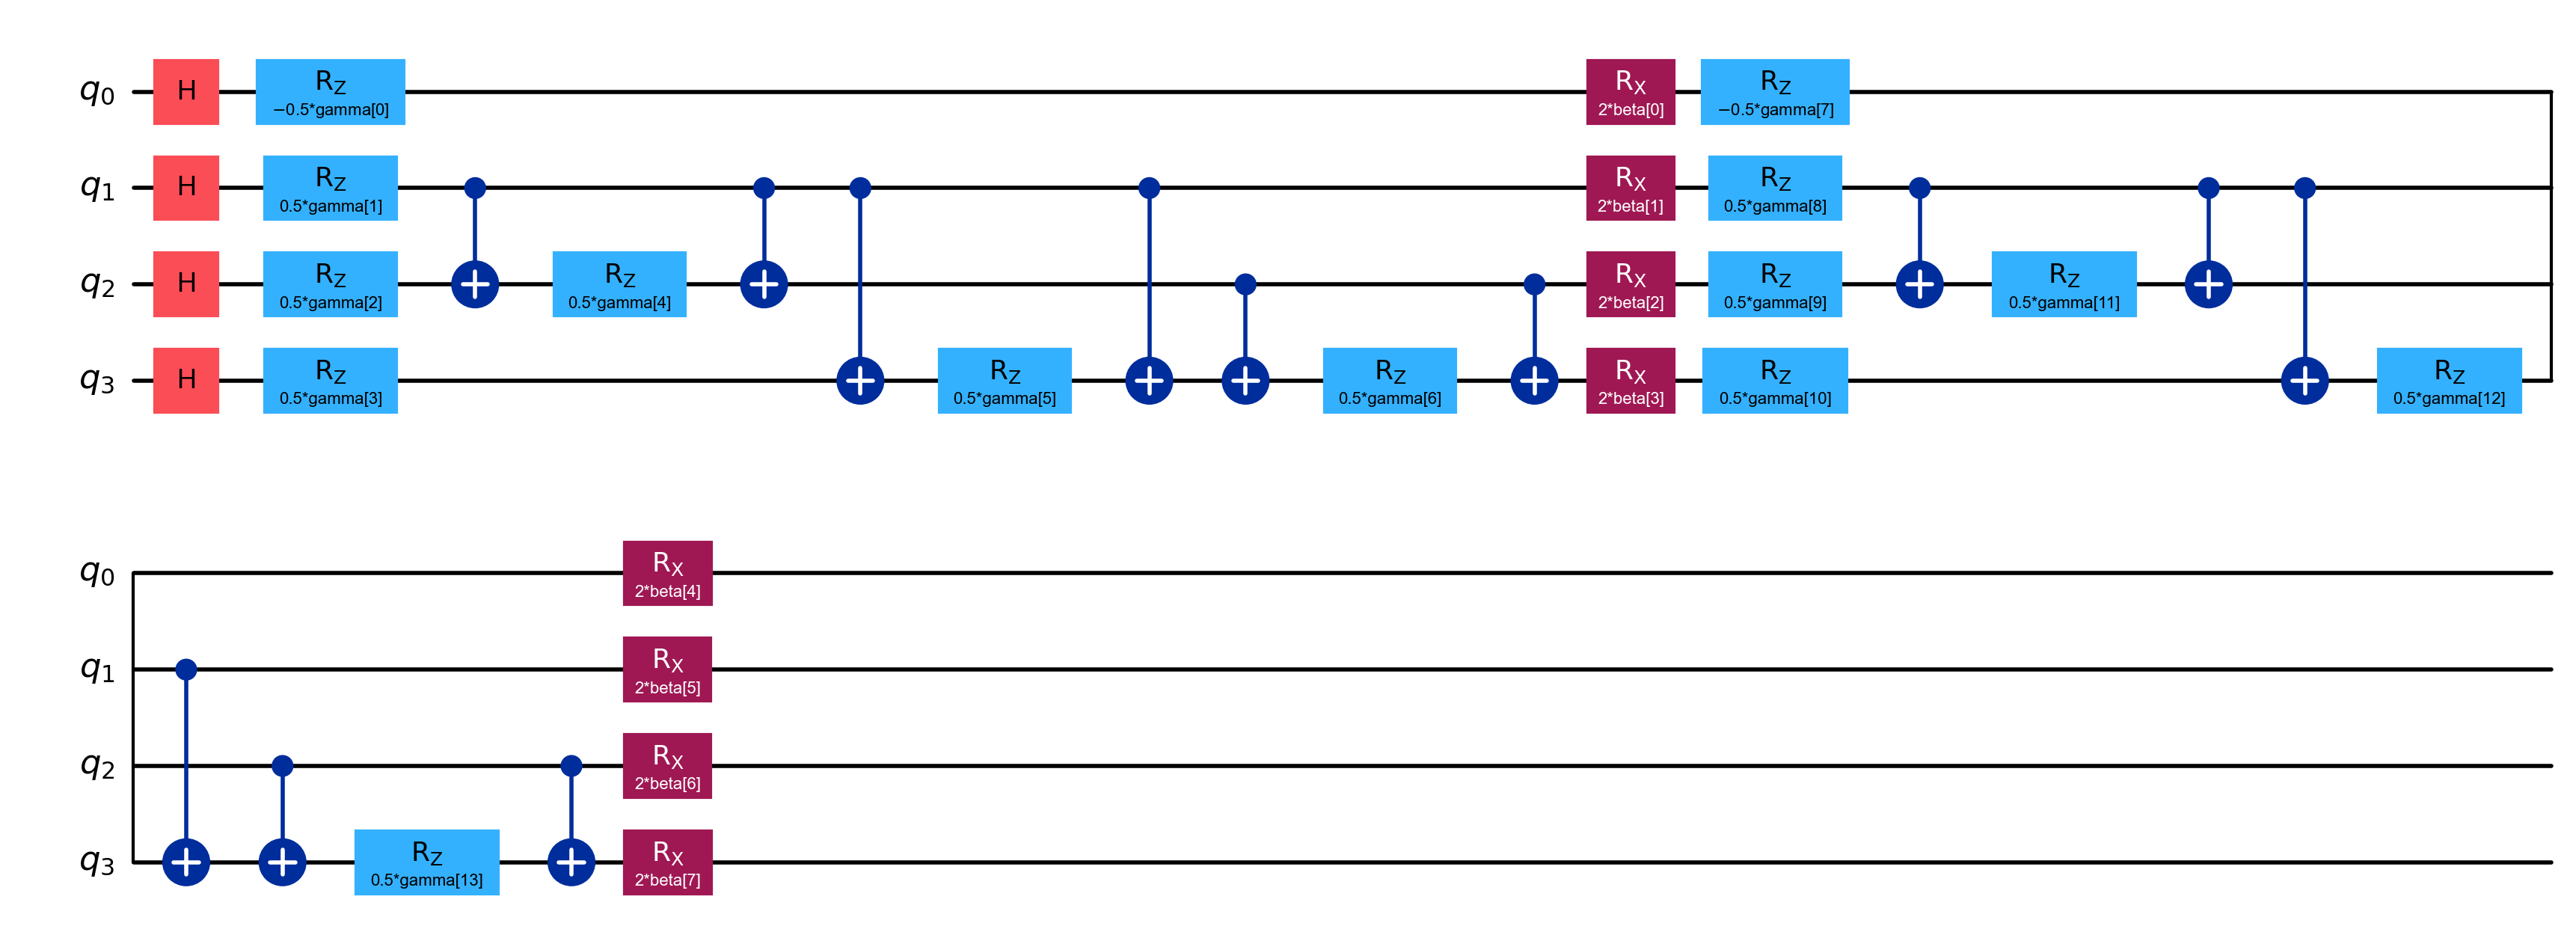

In [7]:
maxClique_circuit, mc_gamma, mc_beta = qaoa_composer(qubo_maxClique_instance, n_layers=2, put_barriers=True)
maxClique_circuit.draw('mpl', plot_barriers=False)

In [8]:
circuit.data

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 1),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 2),), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 3),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterExpression(0.5*gamma[0])]), qubits=(Qubit(QuantumRegister(4, 'q'), 1),), clbits=()), CircuitInstruction(operation=Instruction(n

In [9]:
# from qiskit import QuantumCircuit, QuantumRegister
# from qiskit.circuit import Parameter, Qubit
# from qiskit.circuit.instruction import Instruction

# def extract_circuit_info(circuit):
#     instructions_info = []
    
    
#     for instruction in circuit.data:
#         if instruction.operation.name != 'barrier':
#             gate_info = {
#                 'gate': instruction.operation.name,
#                 'qubits': [qubit._index for qubit in instruction.qubits],
#                 'params': instruction.operation.params
#             }
#             instructions_info.append(gate_info)
    
#     return instructions_info

# # Example usage
# qreg = QuantumRegister(6, 'q')
# circuit = QuantumCircuit(qreg)
# gamma = [Parameter(f'gamma[{i}]') for i in range(10)]
# beta = [Parameter(f'beta[{i}]') for i in range(12)]

# # Add gates to the circuit
# circuit.h(qreg[0])
# circuit.h(qreg[1])
# circuit.cx(qreg[0], qreg[1])
# circuit.rz(0.5 * gamma[0], qreg[1])
# circuit.cx(qreg[0], qreg[1])
# circuit.rx(2 * beta[0], qreg[0])

# circuit.draw('mpl', plot_barriers=False)




In [10]:
# Extract and print circuit information
import data_preprocessing
info = data_preprocessing.get_circuit_gates(circuit)
print(info)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\qiskit-env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\qiskit-env\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\melan\shared-folder\Thesis\SSL-fo

{'n_qubits': 4, 'gates': [{'gate_type': 'h', 'qubits': [0], 'params': []}, {'gate_type': 'h', 'qubits': [1], 'params': []}, {'gate_type': 'h', 'qubits': [2], 'params': []}, {'gate_type': 'h', 'qubits': [3], 'params': []}, {'gate_type': 'cx', 'qubits': [0, 1], 'params': []}, {'gate_type': 'rz', 'qubits': [1], 'params': [ParameterExpression(0.5*gamma[0])]}, {'gate_type': 'cx', 'qubits': [0, 1], 'params': []}, {'gate_type': 'cx', 'qubits': [0, 2], 'params': []}, {'gate_type': 'rz', 'qubits': [2], 'params': [ParameterExpression(0.5*gamma[1])]}, {'gate_type': 'cx', 'qubits': [0, 2], 'params': []}, {'gate_type': 'cx', 'qubits': [0, 3], 'params': []}, {'gate_type': 'rz', 'qubits': [3], 'params': [ParameterExpression(0.5*gamma[2])]}, {'gate_type': 'cx', 'qubits': [0, 3], 'params': []}, {'gate_type': 'rx', 'qubits': [0], 'params': [ParameterExpression(2*beta[0])]}, {'gate_type': 'rx', 'qubits': [1], 'params': [ParameterExpression(2*beta[1])]}, {'gate_type': 'rx', 'qubits': [2], 'params': [Param

In [11]:
len(info)

2

In [12]:
import data_preprocessing
graph, node_pos = data_preprocessing.build_nx_graph_from_circuit(info)


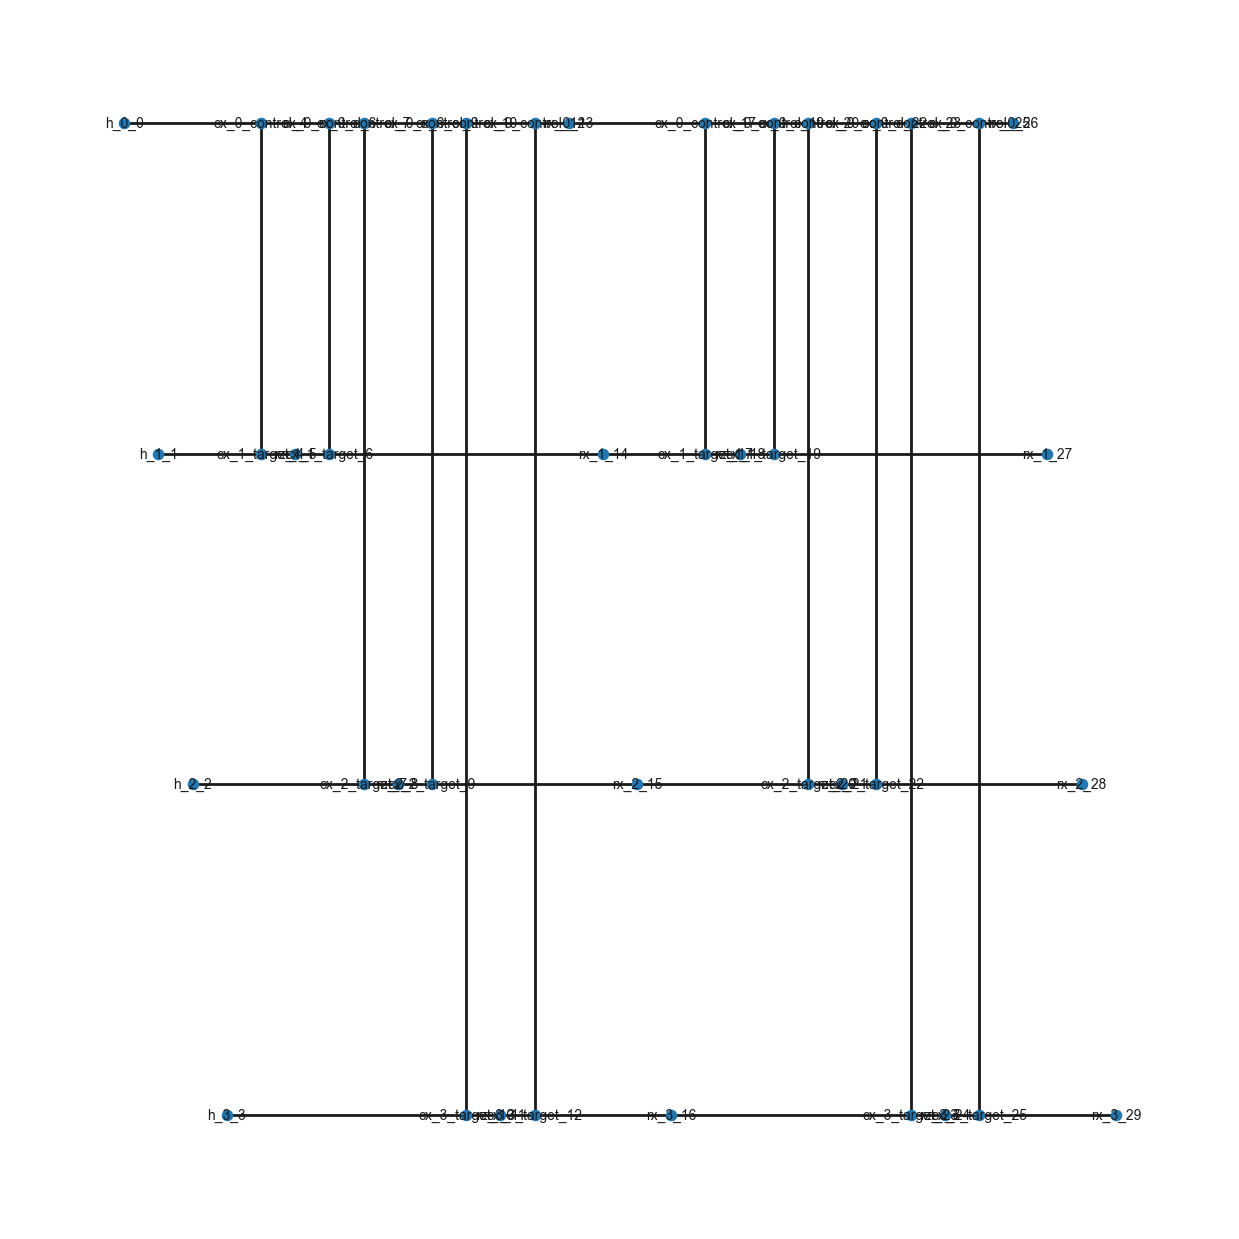

In [13]:
nx.draw(graph, pos= node_pos, with_labels=True, node_size=10, font_size=5)

In [14]:
data = data_preprocessing.build_pyg_graph_from_circuit(info)

In [15]:
x = True
False * None

TypeError: unsupported operand type(s) for *: 'bool' and 'NoneType'